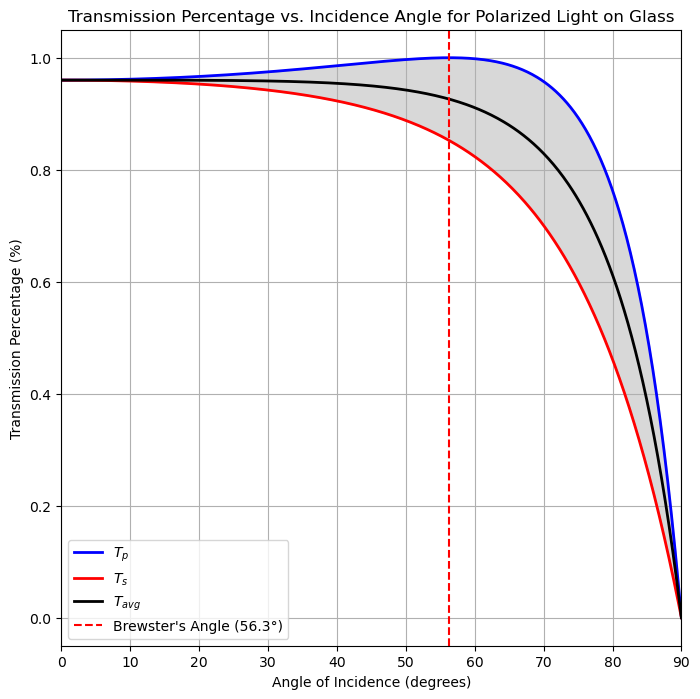

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
n1 = 1.0  # Refractive index of air
n2 = 1.5 # Refractive index of glass

# Brewster's angle
theta_brewster = np.degrees(np.arctan(n2 / n1))

#x=np.arange(0,10,.1)
#brew=np.degrees(np.arctan(x))
#plt.figure(figsize=(8,6))
#plt.plot(x,brew)

# Incident angles from normal (0°) to 70°
angles = np.linspace(0, 90, 500)

# Fresnel equations for reflection coefficients for s- and p-polarized light
def fresnel_s(angle_inc, n1, n2):
    angle_inc_rad = np.radians(angle_inc)
    angle_trans_rad = np.arcsin(n1 * np.sin(angle_inc_rad) / n2)
    return np.abs((n1 * np.cos(angle_inc_rad) - n2 * np.cos(angle_trans_rad)) / 
                  (n1 * np.cos(angle_inc_rad) + n2 * np.cos(angle_trans_rad)))**2

def fresnel_p(angle_inc, n1, n2):
    angle_inc_rad = np.radians(angle_inc)
    angle_trans_rad = np.arcsin(n1 * np.sin(angle_inc_rad) / n2)
    return np.abs((n2 * np.cos(angle_inc_rad) - n1 * np.cos(angle_trans_rad)) / 
                  (n2 * np.cos(angle_inc_rad) + n1 * np.cos(angle_trans_rad)))**2

# Calculate transmission for circularly polarized light
def transmission_percentages(angle_inc, n1, n2):
    r_s = fresnel_s(angle_inc, n1, n2)
    r_p = fresnel_p(angle_inc, n1, n2)
    # Transmission is the average of the s- and p-polarized transmission
    t_s = 1 - r_s
    t_p = 1 - r_p
    return [t_s,t_p]
    

# Transmission percentages for circularly polarized light
t = transmission_percentages(angles, n1, n2) * 100

# Plotting the transmission as a function of angle of incidence
plt.figure(figsize=(8, 8))
plt.plot(angles, t[1], label='$T_{p}$', color='b', linewidth=2)
plt.plot(angles, t[2], label='$T_{s}$', color='r', linewidth=2)
plt.plot(angles, (t[1]+t[2])/2, label='$T_{avg}$', color='black', linewidth=2)
plt.fill_between(angles,t[1],t[2],color='gray',alpha=0.3)
plt.axvline(x=theta_brewster, color='r', linestyle='--', label=f"Brewster's Angle ({theta_brewster:.1f}°)")
plt.title("Transmission Percentage vs. Incidence Angle for Polarized Light on Glass")
plt.xlabel("Angle of Incidence (degrees)")
plt.ylabel("Transmission Percentage (%)")
plt.xlim(0,90)
plt.grid(True)
plt.legend()
plt.show()
